In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px

In [6]:
spotify_df = pd.read_csv('Spotify-2000.csv')
spotify_df.head()

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


In [7]:
# printing more precise information of the data using info()
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Index                   1994 non-null   int64 
 1   Title                   1994 non-null   object
 2   Artist                  1994 non-null   object
 3   Top Genre               1994 non-null   object
 4   Year                    1994 non-null   int64 
 5   Beats Per Minute (BPM)  1994 non-null   int64 
 6   Energy                  1994 non-null   int64 
 7   Danceability            1994 non-null   int64 
 8   Loudness (dB)           1994 non-null   int64 
 9   Liveness                1994 non-null   int64 
 10  Valence                 1994 non-null   int64 
 11  Length (Duration)       1994 non-null   object
 12  Acousticness            1994 non-null   int64 
 13  Speechiness             1994 non-null   int64 
 14  Popularity              1994 non-null   int64 
dtypes: i

In [8]:
spotify_df.nunique()

Index                     1994
Title                     1958
Artist                     731
Top Genre                  149
Year                        63
Beats Per Minute (BPM)     145
Energy                      98
Danceability                84
Loudness (dB)               23
Liveness                    94
Valence                     97
Length (Duration)          350
Acousticness               100
Speechiness                 37
Popularity                  81
dtype: int64

In [8]:
for feature in spotify_df.columns:
  unique = spotify_df[feature].unique()
  print(f"There are {len(unique)} unique values for feature {feature}: {unique[:10]}")

There are 1994 unique values for feature Index: [ 1  2  3  4  5  6  7  8  9 10]
There are 1958 unique values for feature Title: ['Sunrise' 'Black Night' 'Clint Eastwood' 'The Pretender'
 "Waitin' On A Sunny Day" 'The Road Ahead (Miles Of The Unknown)'
 'She Will Be Loved' 'Knights of Cydonia' 'Mr. Brightside' 'Without Me']
There are 731 unique values for feature Artist: ['Norah Jones' 'Deep Purple' 'Gorillaz' 'Foo Fighters' 'Bruce Springsteen'
 'City To City' 'Maroon 5' 'Muse' 'The Killers' 'Eminem']
There are 149 unique values for feature Top Genre: ['adult standards' 'album rock' 'alternative hip hop' 'alternative metal'
 'classic rock' 'alternative pop rock' 'pop' 'modern rock'
 'detroit hip hop' 'alternative rock']
There are 63 unique values for feature Year: [2004 2000 2001 2007 2002 2006 2003 2005 2009 2008]
There are 145 unique values for feature Beats Per Minute (BPM): [157 135 168 173 106  99 102 137 148 112]
There are 98 unique values for feature Energy: [30 79 69 96 82 46 71

In [9]:
# Dosbol -> Top 10 list of popular songs
TopSongs=spotify_df.sort_values("Popularity",ascending=True).head(10)
TopSongs

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
1793,1794,Sacrifice,Anouk,dutch indie,1998,136,17,54,-13,9,24,238,74,5,11
773,774,Hou Vol Hou Vast,BLØF,dutch pop,2018,86,61,51,-5,8,23,295,0,2,12
624,625,Three Days In A Row,Anouk,dutch indie,2015,171,50,36,-6,16,39,254,0,3,13
411,412,Peter Gunn Theme,"Emerson, Lake & Palmer",album rock,2010,131,83,43,-7,92,71,217,1,3,14
605,606,Het Dorp - Live,Wim Sonneveld,dutch cabaret,2015,114,44,37,-15,67,45,198,82,8,15
753,754,Malle Babbe,Rob De Nijs,dutch pop,2018,87,38,35,-10,12,53,253,73,4,15
752,753,Banger Hart - Radio Mix,Rob De Nijs,dutch pop,2018,124,89,77,-9,6,97,261,7,4,16
24,25,Dichterbij Dan Ooit,BLØF,dutch pop,2002,112,74,65,-7,23,52,261,18,3,16
626,627,R U Kiddin' Me,Anouk,dutch indie,2015,89,82,53,-6,9,69,200,1,4,16
754,755,Vluchten Kan Niet Meer,Frans Halsema,dutch rock,2018,87,25,41,-13,38,32,221,74,3,17


In [10]:
most_popular=spotify_df.query("Popularity>90",inplace=False).sort_values("Popularity",ascending=False)
most_popular

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
793,794,Dance Monkey,Tones and I,australian pop,2019,98,59,82,-6,15,51,209,69,9,100
787,788,Memories,Maroon 5,pop,2019,91,32,76,-7,8,57,189,84,5,98
786,787,bad guy,Billie Eilish,electropop,2019,135,43,70,-11,10,56,194,33,38,95
1641,1642,All I Want for Christmas Is You,Mariah Carey,dance pop,1994,150,63,34,-7,7,35,241,16,4,95


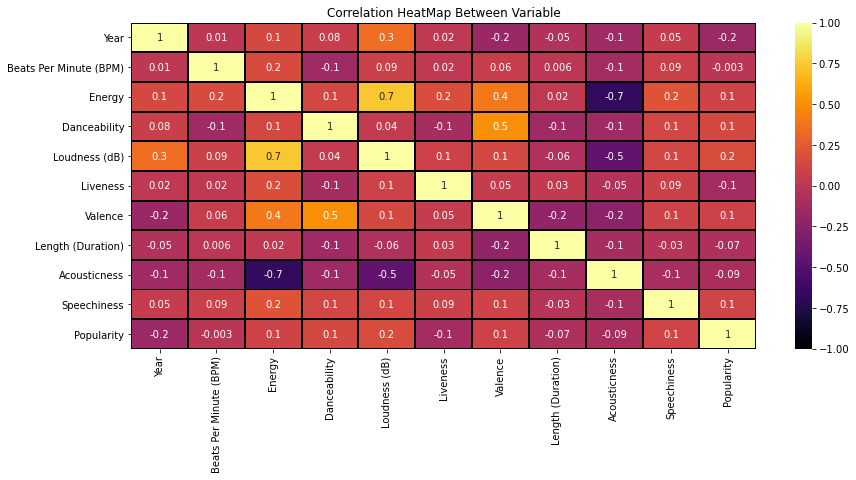

In [11]:
#HeatMap after deleting Feature Index
corr_df=spotify_df.drop(["Index"],axis=1).corr(method="pearson")
plt.figure(figsize=(14,6))
heatmap=sns.heatmap(corr_df,annot=True,fmt=".1g",vmin=-1,vmax=1,center=0,cmap="inferno",linewidths=1,linecolor="Black")
heatmap.set_title("Correlation HeatMap Between Variable")
heatmap.set_xticklabels(heatmap.get_xticklabels(),rotation=90)
plt.show()

In [12]:
sample_df=spotify_df.sample(int(0.1*len(spotify_df)))
print(len(sample_df))

199


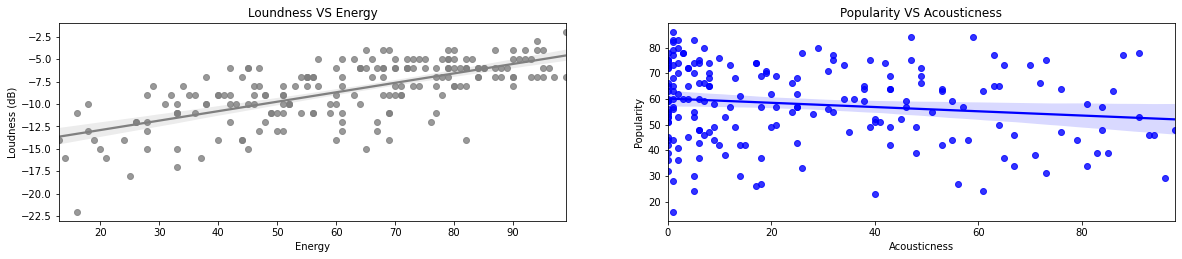

In [13]:

plt.figure(figsize=(20,8))

plt.subplot(2,2,1)
plt.title('Car Length vs Price')
sns.regplot(data=sample_df, y="Loudness (dB)",x="Energy",color="grey").set(title=("Loundness VS Energy"))

plt.subplot(2,2,2)
plt.title('Car Length vs Price')
sns.regplot(data=sample_df, y="Popularity",x="Acousticness",color="blue").set(title=("Popularity VS Acousticness"))

plt.show()

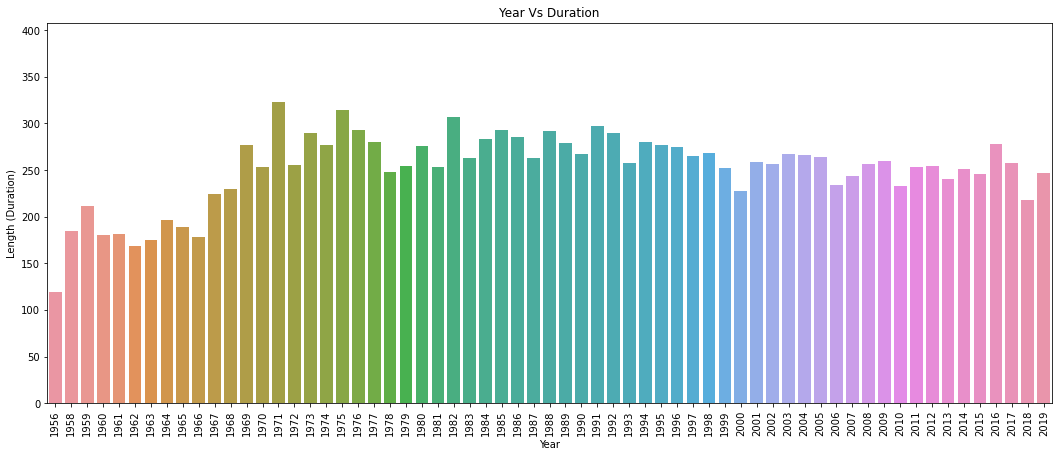

In [15]:
total_dr=spotify_df["Length (Duration)"]
fig_dims=(18,7)
fig, ax = plt.subplots(figsize=fig_dims)
fig=sns.barplot(x=spotify_df["Year"],y=total_dr,ax=ax, errwidth=False).set(title="Year Vs Duration")
plt.xticks(rotation=90)
plt.show()

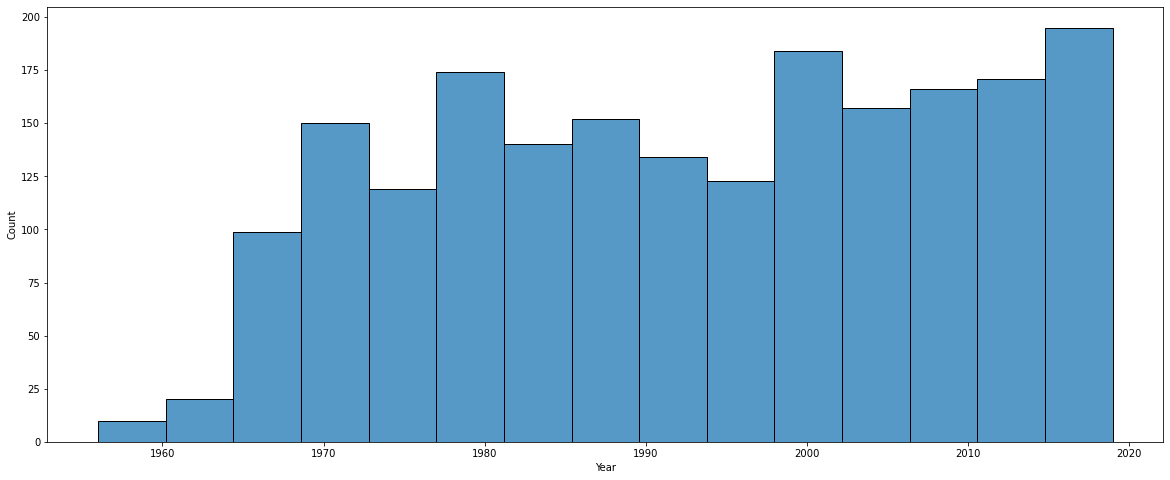

In [4]:
plt.figure(figsize=(20,8))
sns.histplot(spotify_df['Year'])
plt.show()

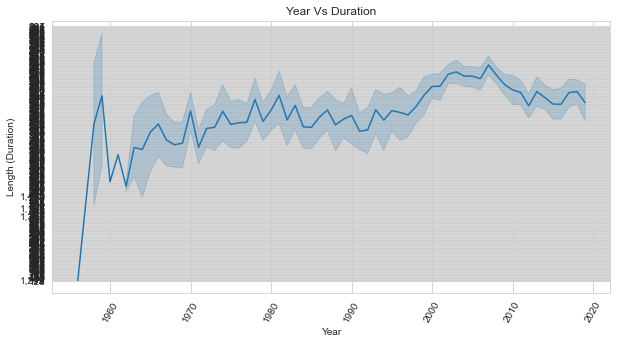

In [15]:
total_dr=spotify_df["Length (Duration)"]
sns.set_style(style="whitegrid")
fig_dims=(10,5)
fig, ax = plt.subplots(figsize=fig_dims)
fig=sns.lineplot(x=spotify_df["Year"],y=total_dr,ax=ax).set(title="Year Vs Duration")
plt.xticks(rotation=60)
plt.show()

<Figure size 1440x576 with 0 Axes>

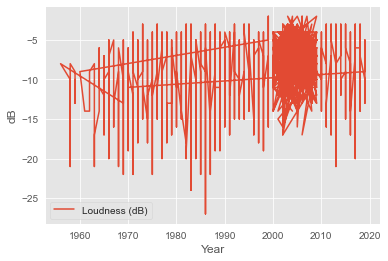

In [55]:
plt.figure(figsize=(20,8))
df_loudness = spotify_df[["Year", "Loudness (dB)"]].set_index("Year")
df_loudness.plot()
plt.ylabel("dB")
plt.show()

In [ ]:
plt.title("Duration of the Songs in Different Genres")
sns.color_palette("rocket",as_cmap=True)
sns.barplot(y='Top Genre',x='Length (Duration)',data=spotify_df)
plt.xlabel("DUration in milli seconds")
plt.ylabel("TOP GENRES")
plt.show()

# STILL WORKING ON IT

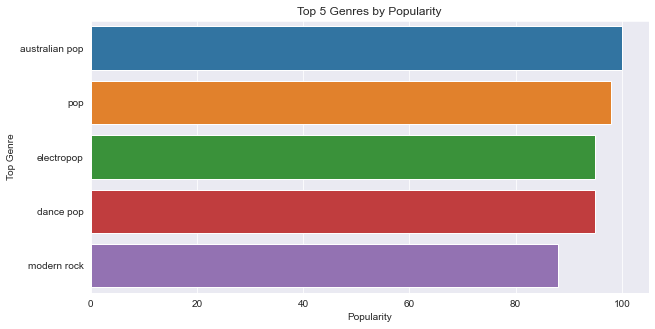

In [14]:
sns.set_style(style="darkgrid")
plt.figure(figsize=(10,5))
famous=spotify_df.sort_values("Popularity", ascending= False).head(5)
x=sns.barplot(y="Top Genre",x="Popularity",data=famous).set(title="Top 5 Genres by Popularity")

plt.show()

In [29]:
df_1=spotify_df.groupby('Popularity')['Danceability'].mean().sort_values(ascending=[False]).reset_index()
df_1.head()

,Popularity,Danceability
0,100,82.0
1,98,76.0
2,88,67.5
3,87,67.0
4,16,65.0


In [32]:
df_genre=spotify_df[spotify_df["Top Genre"]!='[]']
df_genre.head()

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


ValueError: x and y must have same first dimension, but have shapes (15,) and (12,)

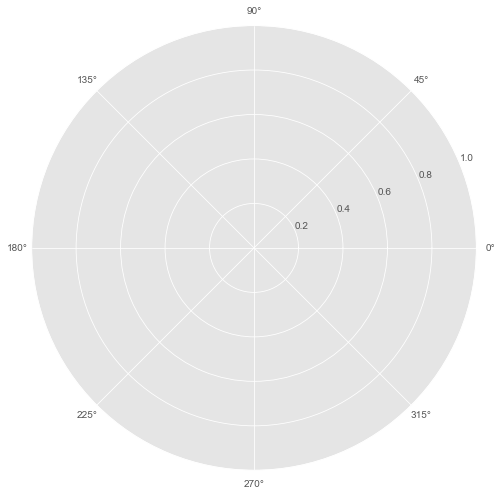

In [48]:
labels = list(most_popular)[:]
features = most_popular.mean().tolist()
features_all = less_popular.mean().tolist()

angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
fig = plt.figure(figsize = (18,18))

ax = fig.add_subplot(221, polar=True)
ax.plot(angles, features, 'o-', linewidth=2, label = "Popular", color= 'blue')
ax.fill(angles, features, alpha=0.25, facecolor='blue')
ax.set_thetagrids(angles * 180/np.pi, labels , fontsize = 13)


ax.set_rlabel_position(250)
plt.yticks([0.1 , 0.2 , 0.3 , 0.4, 0.5,  0.6, 0.7], ["0.1",'0.2', "0.3", "0.4", "0.5", "0.6", '0.7'  ], size=12)
plt.ylim(0,0.7)

ax.plot(angles, features_all, 'o-', linewidth=2, label = "All the Dataset", color= 'orange')
ax.fill(angles, features_all, alpha=0.25, facecolor='orange')
ax.set_title('Mean Values')
ax.grid(True)

plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1))

In [62]:
plt.figure(figsize=(20,8))
px.box(data_frame=spotify_df,y='Artist',color='Popularity')

<Figure size 1440x576 with 0 Axes>

In [64]:
# The Top 5 names of Actors
spotify_df['Artist'].value_counts().head(5)

Queen                 37
The Beatles           36
Coldplay              27
U2                    26
The Rolling Stones    24
Name: Artist, dtype: int64

In [65]:

# The Top 5 Top Genre of Actors
spotify_df['Top Genre'].value_counts().head(5)

album rock          413
adult standards     123
dutch pop            88
alternative rock     86
dance pop            83
Name: Top Genre, dtype: int64

In [66]:

# The Top 5 Title of Actors
spotify_df['Title'].value_counts().head(5)

Hallelujah      3
One             3
Feeling Good    3
Hurt            2
Home Again      2
Name: Title, dtype: int64

In [69]:
df=spotify_df.query("Year>=1800")
df=df.groupby("Year")["Popularity"].count().reset_index()

fig=px.area(df,x="Year",y='Popularity',color_discrete_sequence=px.colors.sequential.RdBu,
           title="Overall content release Trend")
fig.show()

In [70]:
df=spotify_df.query("Year>=1800")
df=df.groupby("Year")["Length (Duration)"].count().reset_index()

fig=px.area(df,x="Year",y='Length (Duration)',color_discrete_sequence=px.colors.sequential.RdBu,
           title="Overall content release Trend")
fig.show()


In [71]:
df=spotify_df.query("Year>=1800")
df=df.groupby("Year")["Danceability"].count().reset_index()

fig=px.area(df,x="Year",y='Danceability',color_discrete_sequence=px.colors.sequential.RdBu,
           title="Overall content release Trend")
fig.show()


In [72]:
df=spotify_df.query("Year>=1800")
df=df.groupby("Year")["Beats Per Minute (BPM)"].count().reset_index()

fig=px.area(df,x="Year",y='Beats Per Minute (BPM)',color_discrete_sequence=px.colors.sequential.RdBu,
           title="Overall content release Trend")
fig.show()


In [73]:
df=spotify_df.query("Year>=1800")
df=df.groupby("Year")["Top Genre"].count().reset_index()

fig=px.area(df,x="Year",y='Top Genre',color_discrete_sequence=px.colors.sequential.RdBu,
           title="Overall content release Trend")
fig.show()


In [ ]:
z=spotify_df.groupby([""])

In [77]:
most_popular=spotify_df.query("Year>2000",inplace=False).sort_values("Popularity",ascending=False)

less_popular=spotify_df.query("Year<=2000",inplace=False).sort_values("Popularity",ascending=False)
dos=['most_popular','less_popular']


In [ ]:
z=spotify_df.groupby("Year").size().reset_index(name="counts")
pieChart=px.pie(z,values='counts',names="Year",
               title="Distibution of Content Ratings on Netflix")
pieChart.show()

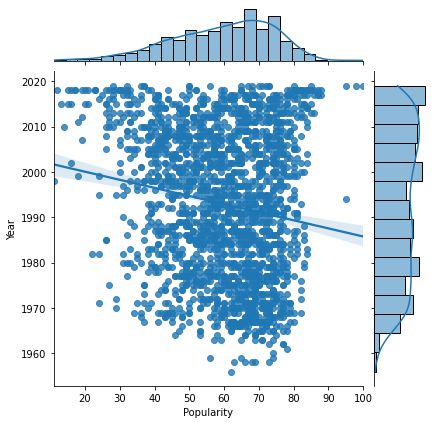

In [11]:
sns.jointplot(x="Popularity",y='Year',data=spotify_df,kind='reg')
plt.show()

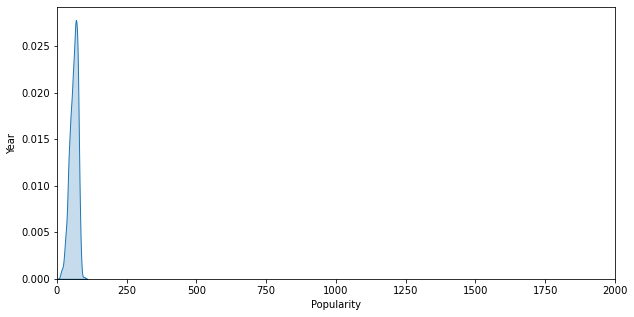

In [13]:
plt.figure(figsize=(10,5))
plt.xlim(0,2000)
plt.xlabel('Popularity')
plt.ylabel('Year')
sns.kdeplot(spotify_df['Popularity'],shade=True)
plt.show()